In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
cus_data = pd.read_csv("retailco_data/retailco_customer_data.csv")
revenue_data = pd.read_csv("retailco_data/retailco_gl_revenue.csv")
store_data = pd.read_csv("retailco_data/retailco_store_data.csv")
transaction_data = pd.read_csv("retailco_data/retailco_transactions_data.csv")
employee_data = pd.read_csv("retailco_data/retailco_user_access_log.csv")

In [45]:
# Cleaning cus_data table

In [46]:
cus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    80 non-null     object
 1   customer_name  80 non-null     object
 2   customer_type  80 non-null     object
 3   join_date      80 non-null     object
dtypes: object(4)
memory usage: 2.6+ KB


In [47]:
cus_data["join_date"] = pd.to_datetime(cus_data["join_date"], errors = "coerce")

In [48]:
cus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    80 non-null     object        
 1   customer_name  80 non-null     object        
 2   customer_type  80 non-null     object        
 3   join_date      80 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 2.6+ KB


In [49]:
cus_data

,customer_id,customer_name,customer_type,join_date
0,C001,Hadi Santoso,Online,2022-07-18
1,C002,Putri Hidayat,Retail,2021-07-29
2,C003,Kurnia Wijaya,Online,2023-05-15
3,C004,Citra Santoso,Retail,2022-03-24
4,C005,Oki Fauziah,Online,2021-02-24
...,...,...,...,...
75,C076,Mega Syahputra,Retail,2021-06-17
76,C077,Cahya Permata,Online,2023-12-07
77,C078,Vina Utomo,Retail,2022-10-06
78,C079,Putri Utomo,Wholesale,2021-09-26


In [50]:
cus_data["customer_type"].unique()

array(['Online', 'Retail', 'Wholesale'], dtype=object)

In [51]:
# Cleaning revenue_data table

In [69]:
revenue_data.head()

,month,gl_account,amount
0,2024-01,400001,53280100.0
1,2024-02,400001,80164300.0
2,2024-03,400001,58988200.0
3,2024-04,400001,42974800.0
4,2024-05,400001,85275000.0


In [53]:
revenue_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       12 non-null     object 
 1   gl_account  12 non-null     int64  
 2   amount      12 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 420.0+ bytes


In [57]:
revenue_data["month"].values

array(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
       '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12'],
      dtype=object)

In [58]:
# Cleaning store_data table

In [71]:
store_data.head()

,store_id,store_name,city,region
0,S001,RetailCo Plaza Jakarta,Jakarta,Jabodetabek
1,S002,RetailCo Mall Bandung,Bandung,Jawa Barat
2,S003,RetailCo Surabaya Center,Surabaya,Jawa Timur
3,S004,RetailCo Medan Square,Medan,Sumatera Utara
4,S005,RetailCo Denpasar Point,Denpasar,Bali


In [60]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_id    5 non-null      object
 1   store_name  5 non-null      object
 2   city        5 non-null      object
 3   region      5 non-null      object
dtypes: object(4)
memory usage: 292.0+ bytes


In [61]:
# Cleaning transaction_data table

In [62]:
transaction_data

,invoice_id,invoice_date,posting_date,store_id,customer_id,product_id,quantity,unit_price,gross_amount,discount_amount,net_amount,created_by
0,INV000001,2024-03-23,2024-03-25,S005,C001,P020,6,249000,1494000,201300.0,1292700.0,u_andika
1,INV000002,2024-02-27,2024-02-28,S003,C031,P002,4,299000,1196000,108000.0,1088000.0,u_bella
2,INV000003,2024-02-13,2024-02-16,S004,C009,P025,9,149000,1341000,194900.0,1146100.0,u_citra
3,INV000004,2024-12-03,2024-12-04,S005,C022,P009,9,299000,2691000,556000.0,2135000.0,u_gita
4,INV000005,2024-04-18,2024-04-20,S002,C040,P013,6,249000,1494000,124900.0,1369100.0,u_hanif
...,...,...,...,...,...,...,...,...,...,...,...,...
745,INV000746,2025-01-05,2024-12-31,S002,C030,P009,5,99000,495000,69900.0,425100.0,u_gita
746,INV000747,2025-01-05,2024-12-31,S002,C010,P024,6,249000,1494000,415400.0,1078600.0,u_citra
747,INV000748,2025-01-05,2024-12-30,S005,C013,P020,5,99000,495000,67700.0,427300.0,u_gita
748,INV000749,2025-01-05,2024-12-27,S001,C043,P012,7,249000,1743000,275900.0,1467100.0,u_bella


In [63]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   invoice_id       750 non-null    object 
 1   invoice_date     750 non-null    object 
 2   posting_date     750 non-null    object 
 3   store_id         750 non-null    object 
 4   customer_id      750 non-null    object 
 5   product_id       750 non-null    object 
 6   quantity         750 non-null    int64  
 7   unit_price       750 non-null    int64  
 8   gross_amount     750 non-null    int64  
 9   discount_amount  750 non-null    float64
 10  net_amount       750 non-null    float64
 11  created_by       750 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 70.4+ KB


In [64]:
transaction_data["invoice_date"] = pd.to_datetime(transaction_data["invoice_date"], errors = "coerce")

In [65]:
transaction_data["posting_date"] = pd.to_datetime(transaction_data["posting_date"], errors = "coerce")

In [66]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   invoice_id       750 non-null    object        
 1   invoice_date     750 non-null    datetime64[ns]
 2   posting_date     750 non-null    datetime64[ns]
 3   store_id         750 non-null    object        
 4   customer_id      750 non-null    object        
 5   product_id       750 non-null    object        
 6   quantity         750 non-null    int64         
 7   unit_price       750 non-null    int64         
 8   gross_amount     750 non-null    int64         
 9   discount_amount  750 non-null    float64       
 10  net_amount       750 non-null    float64       
 11  created_by       750 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 70.4+ KB


In [67]:
transaction_data.head()

,invoice_id,invoice_date,posting_date,store_id,customer_id,product_id,quantity,unit_price,gross_amount,discount_amount,net_amount,created_by
0,INV000001,2024-03-23,2024-03-25,S005,C001,P020,6,249000,1494000,201300.0,1292700.0,u_andika
1,INV000002,2024-02-27,2024-02-28,S003,C031,P002,4,299000,1196000,108000.0,1088000.0,u_bella
2,INV000003,2024-02-13,2024-02-16,S004,C009,P025,9,149000,1341000,194900.0,1146100.0,u_citra
3,INV000004,2024-12-03,2024-12-04,S005,C022,P009,9,299000,2691000,556000.0,2135000.0,u_gita
4,INV000005,2024-04-18,2024-04-20,S002,C040,P013,6,249000,1494000,124900.0,1369100.0,u_hanif


In [72]:
# Cleaning employee_data table

In [73]:
employee_data

,user_id,user_name,role,can_create_invoice,can_approve_discount,can_modify_master_data
0,u_andika,Andika,Sales Clerk,Y,N,N
1,u_bella,Bella,Sales Clerk,Y,N,N
2,u_citra,Citra,Senior Sales,Y,Y,N
3,u_dwi,Dwi,Store Supervisor,N,Y,N
4,u_eka,Eka,Store Manager,N,Y,Y
5,u_fajar,Fajar,Back Office,N,N,Y
6,u_gita,Gita,Online Channel,Y,Y,N
7,u_hanif,Hanif,Admin,N,N,Y


In [74]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_id                 8 non-null      object
 1   user_name               8 non-null      object
 2   role                    8 non-null      object
 3   can_create_invoice      8 non-null      object
 4   can_approve_discount    8 non-null      object
 5   can_modify_master_data  8 non-null      object
dtypes: object(6)
memory usage: 516.0+ bytes


<!-- Customer Analysis -->

# Customer Analysis

In [75]:
# 1. RFM Segmentation

# a. Compute Recency, Frequency, and Monetary value for each customer.

# b. Segment customers into categories such as “Champions”, “Loyal”, “At Risk”, and “Lost”.

# Goal: Identify high-value and at-risk customers for retention campaigns.


In [76]:
transaction_data

,invoice_id,invoice_date,posting_date,store_id,customer_id,product_id,quantity,unit_price,gross_amount,discount_amount,net_amount,created_by
0,INV000001,2024-03-23,2024-03-25,S005,C001,P020,6,249000,1494000,201300.0,1292700.0,u_andika
1,INV000002,2024-02-27,2024-02-28,S003,C031,P002,4,299000,1196000,108000.0,1088000.0,u_bella
2,INV000003,2024-02-13,2024-02-16,S004,C009,P025,9,149000,1341000,194900.0,1146100.0,u_citra
3,INV000004,2024-12-03,2024-12-04,S005,C022,P009,9,299000,2691000,556000.0,2135000.0,u_gita
4,INV000005,2024-04-18,2024-04-20,S002,C040,P013,6,249000,1494000,124900.0,1369100.0,u_hanif
...,...,...,...,...,...,...,...,...,...,...,...,...
745,INV000746,2025-01-05,2024-12-31,S002,C030,P009,5,99000,495000,69900.0,425100.0,u_gita
746,INV000747,2025-01-05,2024-12-31,S002,C010,P024,6,249000,1494000,415400.0,1078600.0,u_citra
747,INV000748,2025-01-05,2024-12-30,S005,C013,P020,5,99000,495000,67700.0,427300.0,u_gita
748,INV000749,2025-01-05,2024-12-27,S001,C043,P012,7,249000,1743000,275900.0,1467100.0,u_bella


In [100]:
max_date = transaction_data["invoice_date"].max()

In [103]:
customer_last_purchase = transaction_data.groupby("customer_id")["invoice_date"].max()

In [114]:
recency = (max_date - customer_last_purchase).dt.days.sort_values().reset_index()

In [115]:
recency

,customer_id,invoice_date
0,C010,0
1,C002,0
2,C043,0
3,C030,0
4,C013,0
...,...,...
75,C078,95
76,C036,104
77,C075,160
78,C038,175


In [85]:
freq = transaction_data["customer_id"].value_counts().reset_index()
freq.columns = ["customer_id", "Frequency"]

In [87]:
freq

,customer_id,Frequency
0,C002,18
1,C070,17
2,C023,15
3,C007,15
4,C043,14
...,...,...
75,C004,5
76,C013,5
77,C053,4
78,C008,4


In [92]:
monetary = transaction_data.groupby("customer_id")["net_amount"].sum().sort_values(ascending = False).reset_index()

In [116]:
monetary

,customer_id,net_amount
0,C002,26790100.0
1,C023,18779100.0
2,C072,18444000.0
3,C070,17194400.0
4,C054,16235800.0
...,...,...
75,C061,4954000.0
76,C064,4669700.0
77,C034,3666500.0
78,C045,3443300.0


In [118]:
rfm = pd.DataFrame({
    "customer_id": recency["customer_id"],  
    "recency": None
})

rfm.reset_index(drop=True, inplace=True)

In [121]:
rfm["recency_points"] = pd.qcut(recency["invoice_date"], 5, labels = [5,4,3,2,1])

In [131]:
rfm["freq_points"] = pd.qcut(freq["Frequency"], 5, labels = [1,2,3,4,5])

In [132]:
rfm["mon_points"] = pd.qcut(monetary["net_amount"], 5, labels = [1,2,3,4,5])

In [133]:
rfm

,customer_id,recency_points,freq_points,mon_points
0,C010,5,5,5
1,C002,5,5,5
2,C043,5,5,5
3,C030,5,5,5
4,C013,5,5,5
...,...,...,...,...
75,C078,1,1,1
76,C036,1,1,1
77,C075,1,1,1
78,C038,1,1,1


In [137]:
rfm["recency_points"] = pd.to_numeric(rfm["recency_points"])
rfm["freq_points"] = pd.to_numeric(rfm["freq_points"])
rfm["mon_points"] = pd.to_numeric(rfm["mon_points"])

In [139]:
rfm["total_points"] = rfm["recency_points"] + rfm["freq_points"] + rfm["mon_points"]

In [156]:
rfm["cus_status"] = pd.qcut(rfm["total_points"], 4, labels=["Lost", "At Risk", "Loyal", "Champions"])

In [157]:
rfm

,customer_id,recency_points,freq_points,mon_points,total_points,cus_status
0,C010,5,5,5,15,Champions
1,C002,5,5,5,15,Champions
2,C043,5,5,5,15,Champions
3,C030,5,5,5,15,Champions
4,C013,5,5,5,15,Champions
...,...,...,...,...,...,...
75,C078,1,1,1,3,Lost
76,C036,1,1,1,3,Lost
77,C075,1,1,1,3,Lost
78,C038,1,1,1,3,Lost


In [161]:
cus_data

,customer_id,customer_name,customer_type,join_date
0,C001,Hadi Santoso,Online,2022-07-18
1,C002,Putri Hidayat,Retail,2021-07-29
2,C003,Kurnia Wijaya,Online,2023-05-15
3,C004,Citra Santoso,Retail,2022-03-24
4,C005,Oki Fauziah,Online,2021-02-24
...,...,...,...,...
75,C076,Mega Syahputra,Retail,2021-06-17
76,C077,Cahya Permata,Online,2023-12-07
77,C078,Vina Utomo,Retail,2022-10-06
78,C079,Putri Utomo,Wholesale,2021-09-26


In [162]:
cus_data = cus_data.merge(rfm[['customer_id', 'cus_status']], on='customer_id', how='left')

In [163]:
cus_data

,customer_id,customer_name,customer_type,join_date,cus_status
0,C001,Hadi Santoso,Online,2022-07-18,Lost
1,C002,Putri Hidayat,Retail,2021-07-29,Champions
2,C003,Kurnia Wijaya,Online,2023-05-15,At Risk
3,C004,Citra Santoso,Retail,2022-03-24,Lost
4,C005,Oki Fauziah,Online,2021-02-24,Loyal
...,...,...,...,...,...
75,C076,Mega Syahputra,Retail,2021-06-17,Loyal
76,C077,Cahya Permata,Online,2023-12-07,Champions
77,C078,Vina Utomo,Retail,2022-10-06,Lost
78,C079,Putri Utomo,Wholesale,2021-09-26,Lost


In [ ]:
# Top Customers Analysis

# Identify the top 10 customers by total net revenue.

# Analyze which stores and products contribute most to their purchases.

# Goal: Focus marketing and personalized offers on high-value customers.


In [173]:
high_paying_cus = transaction_data.groupby("customer_id")["net_amount"].sum().sort_values(ascending = False).head(10).index

In [174]:
high_paying_cus

Index(['C002', 'C023', 'C072', 'C070', 'C054', 'C022', 'C037', 'C050', 'C007',
       'C032'],
      dtype='object', name='customer_id')

In [178]:
target_data = transaction_data[transaction_data["customer_id"].isin(high_paying_cus)]

In [183]:
high_paying_cus_stores = target_data["store_id"].value_counts().reset_index()

In [189]:
high_paying_cus_stores = high_paying_cus_stores.merge(store_data[["store_id", "store_name"]], on = "store_id", how="left")

In [190]:
high_paying_cus_stores

,store_id,count,store_name
0,S003,35,RetailCo Surabaya Center
1,S005,34,RetailCo Denpasar Point
2,S002,25,RetailCo Mall Bandung
3,S004,23,RetailCo Medan Square
4,S001,20,RetailCo Plaza Jakarta


In [181]:
target_data["product_id"].value_counts().head()

product_id
P018    10
P021     9
P016     8
P015     8
P002     7
Name: count, dtype: int64

In [192]:
# Conclusion: so the high paying customers love to go to stores: S003 and S005 i.e. RetailCo Surabaya Center and RetailCo Denpasar Point
# and their fav. products are P018, P021, P016, P015, P002

In [193]:
# Churn Risk Analysis

# Identify customers who haven’t made any transactions in the last 3 months.

# Goal: Proactively re-engage these customers to prevent revenue loss.


In [211]:
last_3_months = transaction_data[(transaction_data["invoice_date"] >= pd.to_datetime("2024-10-05")) & 
(transaction_data["invoice_date"] <= max_date)]

In [212]:
last_3_months["customer_id"].unique()

array(['C022', 'C010', 'C031', 'C002', 'C004', 'C054', 'C052', 'C007',
       'C061', 'C001', 'C033', 'C073', 'C065', 'C058', 'C055', 'C040',
       'C079', 'C019', 'C037', 'C042', 'C043', 'C012', 'C021', 'C025',
       'C050', 'C030', 'C057', 'C064', 'C059', 'C072', 'C060', 'C039',
       'C009', 'C068', 'C017', 'C018', 'C005', 'C070', 'C011', 'C047',
       'C067', 'C066', 'C077', 'C074', 'C041', 'C013', 'C048', 'C063',
       'C051', 'C023', 'C008', 'C035', 'C053', 'C049', 'C076', 'C014',
       'C045', 'C027', 'C069', 'C006', 'C044', 'C029', 'C062', 'C046',
       'C080', 'C016', 'C024', 'C015', 'C028', 'C032', 'C071', 'C056',
       'C003', 'C026', 'C020'], dtype=object)

In [213]:
cus_data[~cus_data["customer_id"].isin(last_3_months["customer_id"].unique())]

# So these are the customers who has not done payment in last 3 months

,customer_id,customer_name,customer_type,join_date,cus_status
33,C034,Kurnia Utomo,Online,2022-11-28,Lost
35,C036,Farhan Santoso,Online,2022-06-24,Lost
37,C038,Utami Fauziah,Online,2022-02-12,Lost
74,C075,Bayu Saputra,Online,2022-05-20,Lost
77,C078,Vina Utomo,Retail,2022-10-06,Lost


In [215]:
# Customer Type Comparison

# Compare Online, Retail, and Wholesale customers on:

# Average revenue per customer

# Average discount received

# Goal: Understand customer type behavior and tailor strategies accordingly.


In [219]:
transaction_data = transaction_data.merge(cus_data[["customer_id", "customer_type"]], on = "customer_id", how="left")

In [232]:
transaction_data.groupby("customer_type")["net_amount"].mean().round(2)

customer_type
Online       1138464.86
Retail       1074365.36
Wholesale    1084459.46
Name: net_amount, dtype: float64

In [231]:
transaction_data.groupby("customer_type")["discount_amount"].mean().round(2)

customer_type
Online       132508.11
Retail       140222.88
Wholesale    128193.69
Name: discount_amount, dtype: float64

# Store & Revenue Analysis

In [341]:
# Monthly Revenue Trend

# Plot monthly revenue trends from transaction data and compare with revenue totals data table.

# Goal: Identify seasonality and revenue growth patterns.


In [237]:
transaction_data["posting_month"] = transaction_data["posting_date"].dt.month

In [238]:
transaction_data

,invoice_id,invoice_date,posting_date,store_id,customer_id,product_id,quantity,unit_price,gross_amount,discount_amount,net_amount,created_by,customer_type,posting_month
0,INV000001,2024-03-23,2024-03-25,S005,C001,P020,6,249000,1494000,201300.0,1292700.0,u_andika,Online,3
1,INV000002,2024-02-27,2024-02-28,S003,C031,P002,4,299000,1196000,108000.0,1088000.0,u_bella,Retail,2
2,INV000003,2024-02-13,2024-02-16,S004,C009,P025,9,149000,1341000,194900.0,1146100.0,u_citra,Retail,2
3,INV000004,2024-12-03,2024-12-04,S005,C022,P009,9,299000,2691000,556000.0,2135000.0,u_gita,Retail,12
4,INV000005,2024-04-18,2024-04-20,S002,C040,P013,6,249000,1494000,124900.0,1369100.0,u_hanif,Wholesale,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,INV000746,2025-01-05,2024-12-31,S002,C030,P009,5,99000,495000,69900.0,425100.0,u_gita,Retail,12
746,INV000747,2025-01-05,2024-12-31,S002,C010,P024,6,249000,1494000,415400.0,1078600.0,u_citra,Retail,12
747,INV000748,2025-01-05,2024-12-30,S005,C013,P020,5,99000,495000,67700.0,427300.0,u_gita,Online,12
748,INV000749,2025-01-05,2024-12-27,S001,C043,P012,7,249000,1743000,275900.0,1467100.0,u_bella,Retail,12


In [246]:
org_rev_per_month = transaction_data.groupby("posting_month")["net_amount"].sum().values

In [248]:
revenue_data

,month,gl_account,amount
0,2024-01,400001,53280100.0
1,2024-02,400001,80164300.0
2,2024-03,400001,58988200.0
3,2024-04,400001,42974800.0
4,2024-05,400001,85275000.0
5,2024-06,400001,63009800.0
6,2024-07,400001,84800900.0
7,2024-08,400001,49741600.0
8,2024-09,400001,59771000.0
9,2024-10,400001,63875700.0


Text(0.5, 1.0, 'Calculated vs Initially Given Revenue')

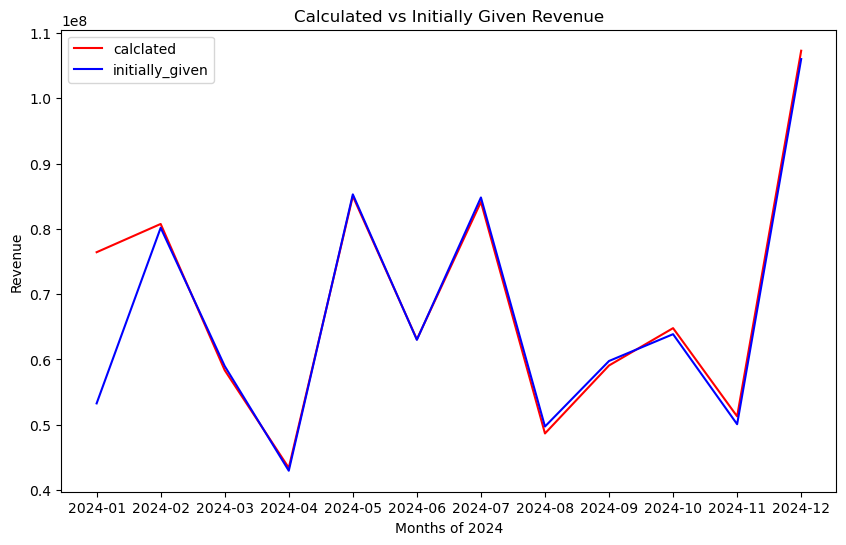

In [256]:
plt.figure(figsize = (10,6))
plt.plot(revenue_data["month"], org_rev_per_month, color = "red", label = "calclated")
plt.plot(revenue_data["month"], revenue_data["amount"], color = "blue", label = "initially_given")
plt.xlabel("Months of 2024")
plt.ylabel("Revenue")
plt.legend()
plt.title("Calculated vs Initially Given Revenue")

In [257]:
# Top-Performing Stores

# Rank stores by total net revenue, average discount offered, and number of transactions.

# Goal: Highlight high-performing stores and identify underperformers.


In [261]:
# Rank of stores by net revenue
transaction_data.groupby("store_id")["net_amount"].sum().sort_values(ascending = False)

store_id
S003    181518400.0
S004    165575100.0
S001    164526700.0
S002    156690900.0
S005    153933900.0
Name: net_amount, dtype: float64

In [263]:
# Rank of stores by average discount offered
transaction_data.groupby("store_id")["discount_amount"].mean().sort_values(ascending = False)

store_id
S005    147671.917808
S001    143784.353741
S004    131843.918919
S003    126346.987952
S002    123084.615385
Name: discount_amount, dtype: float64

In [264]:
# Rank of stores by number of transactions
transaction_data.groupby("store_id")["invoice_id"].count().sort_values(ascending = False)

store_id
S003    166
S004    148
S001    147
S005    146
S002    143
Name: invoice_id, dtype: int64

In [265]:
# Regional Performance Analysis

# Compare revenue contribution by region and customer type.

# Goal: Optimize resource allocation and marketing for high-potential regions.


In [267]:
transaction_data.groupby("store_id")["invoice_id"].count().sort_values(ascending = False)

store_id
S003    166
S004    148
S001    147
S005    146
S002    143
Name: invoice_id, dtype: int64

In [269]:
store_data[store_data["store_id"] == "S003"]

,store_id,store_name,city,region
2,S003,RetailCo Surabaya Center,Surabaya,Jawa Timur


In [277]:
filtered = transaction_data[transaction_data["store_id"] == "S003"]
result = filtered.groupby("customer_type")["net_amount"].sum().sort_values(ascending=False)
result

customer_type
Wholesale    72003100.0
Retail       58194400.0
Online       51320900.0
Name: net_amount, dtype: float64

In [278]:
# So in the most famous store S003 most of the revenue is derived from Wholesale customers.

# Employee & Sales Performance

In [279]:
# Employee Revenue Contribution

# Identify top-performing employees based on total net revenue generated.

# Goal: Reward high performers and optimize staff deployment.


In [288]:
empl_rev = transaction_data.groupby("created_by")["net_amount"].sum().sort_values(ascending = False).reset_index()

In [287]:
employee_data

,user_id,user_name,role,can_create_invoice,can_approve_discount,can_modify_master_data
0,u_andika,Andika,Sales Clerk,Y,N,N
1,u_bella,Bella,Sales Clerk,Y,N,N
2,u_citra,Citra,Senior Sales,Y,Y,N
3,u_dwi,Dwi,Store Supervisor,N,Y,N
4,u_eka,Eka,Store Manager,N,Y,Y
5,u_fajar,Fajar,Back Office,N,N,Y
6,u_gita,Gita,Online Channel,Y,Y,N
7,u_hanif,Hanif,Admin,N,N,Y


In [291]:
empl_rev.columns = ["user_id", "revenue"]

In [293]:
empl_rev = empl_rev.merge(employee_data[["user_id","user_name","role"]], on= "user_id", how = "left")

In [295]:
empl_rev.drop(columns = ["user_name_y", "role_y"])

,user_id,revenue,user_name_x,role_x
0,u_citra,115392500.0,Citra,Senior Sales
1,u_hanif,114813400.0,Hanif,Admin
2,u_eka,107563900.0,Eka,Store Manager
3,u_fajar,106873100.0,Fajar,Back Office
4,u_bella,105296600.0,Bella,Sales Clerk
5,u_andika,97523700.0,Andika,Sales Clerk
6,u_gita,90451900.0,Gita,Online Channel
7,u_dwi,84329900.0,Dwi,Store Supervisor


In [301]:
empl_rev = empl_rev.drop(columns = ["user_name_y", "role_y"])

In [303]:
empl_rev = empl_rev.rename(columns={
    "user_name_x": "user_name",
    "role_x": "role"
})

In [305]:
empl_rev = empl_rev[["user_id", "user_name", "role", "revenue"]]

In [306]:
empl_rev

,user_id,user_name,role,revenue
0,u_citra,Citra,Senior Sales,115392500.0
1,u_hanif,Hanif,Admin,114813400.0
2,u_eka,Eka,Store Manager,107563900.0
3,u_fajar,Fajar,Back Office,106873100.0
4,u_bella,Bella,Sales Clerk,105296600.0
5,u_andika,Andika,Sales Clerk,97523700.0
6,u_gita,Gita,Online Channel,90451900.0
7,u_dwi,Dwi,Store Supervisor,84329900.0


In [307]:
# Discount vs Revenue Analysis

# Examine if employees who approve higher discounts generate higher net revenue.

# Goal: Determine whether discounts are effectively driving sales or hurting margins.

In [310]:
emply_track = transaction_data.groupby("created_by")["net_amount"].mean().sort_values(ascending = False).round(1).reset_index()

In [311]:
emply_track

,created_by,net_amount
0,u_hanif,1171565.3
1,u_citra,1153925.0
2,u_andika,1133996.5
3,u_eka,1120457.3
4,u_bella,1120176.6
5,u_fajar,1113261.5
6,u_gita,1027862.5
7,u_dwi,916629.3


In [313]:
emply_disc = transaction_data.groupby("created_by")["discount_amount"].mean().sort_values(ascending = False).round(1).reset_index()


In [314]:
emply_disc

,created_by,discount_amount
0,u_citra,152115.0
1,u_gita,144444.3
2,u_hanif,144138.8
3,u_fajar,136249.0
4,u_andika,134457.0
5,u_bella,133600.0
6,u_eka,116532.3
7,u_dwi,112468.5


In [315]:
emply_track = emply_track.merge(emply_disc[["created_by", "discount_amount"]], on = "created_by", how = "left")

In [316]:
emply_track

,created_by,net_amount,discount_amount
0,u_hanif,1171565.3,144138.8
1,u_citra,1153925.0,152115.0
2,u_andika,1133996.5,134457.0
3,u_eka,1120457.3,116532.3
4,u_bella,1120176.6,133600.0
5,u_fajar,1113261.5,136249.0
6,u_gita,1027862.5,144444.3
7,u_dwi,916629.3,112468.5


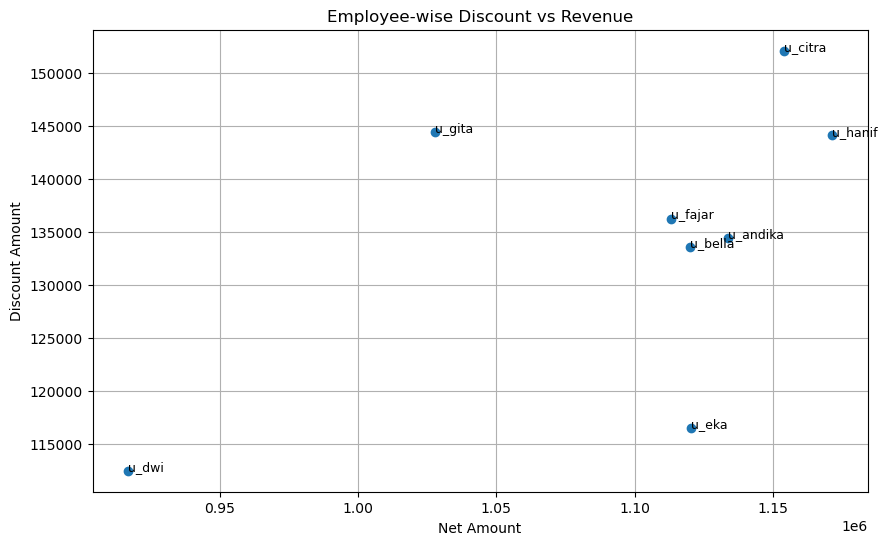

In [323]:
plt.figure(figsize = (10,6))
plt.scatter(emply_track["net_amount"], emply_track["discount_amount"])

for i in range(len(emply_track)):
    x = emply_track["net_amount"][i]
    y = emply_track["discount_amount"][i]
    label = emply_track["created_by"][i]
    plt.text(x, y, label, fontsize=9)

plt.xlabel("Net Amount")
plt.ylabel("Discount Amount")
plt.title("Employee-wise Discount vs Revenue")
plt.grid(True)

# Product & Transaction Insights

In [325]:
# Top Products by Revenue & Quantity

# Identify top 10 products by total quantity sold and net revenue.

# Goal: Focus on popular products and optimize stock levels.

In [330]:
transaction_data.groupby("product_id")["quantity"].sum().sort_values(ascending = False).head(10)

product_id
P015    223
P018    222
P012    209
P021    200
P020    200
P016    194
P013    190
P023    187
P007    186
P019    181
Name: quantity, dtype: int64

In [331]:
transaction_data.groupby("product_id")["net_amount"].sum().sort_values(ascending = False).head(10)

product_id
P015    45633100.0
P018    43052700.0
P012    42548900.0
P020    38513200.0
P013    37702700.0
P016    37321500.0
P023    36291000.0
P007    35085900.0
P025    34623100.0
P021    34529100.0
Name: net_amount, dtype: float64

In [332]:
# Product Margin Analysis

# Compute gross margin per product (gross_amount - discount_amount).

# Goal: Identify high-margin products to prioritize in promotions.

In [333]:
transaction_data

,invoice_id,invoice_date,posting_date,store_id,customer_id,product_id,quantity,unit_price,gross_amount,discount_amount,net_amount,created_by,customer_type,posting_month
0,INV000001,2024-03-23,2024-03-25,S005,C001,P020,6,249000,1494000,201300.0,1292700.0,u_andika,Online,3
1,INV000002,2024-02-27,2024-02-28,S003,C031,P002,4,299000,1196000,108000.0,1088000.0,u_bella,Retail,2
2,INV000003,2024-02-13,2024-02-16,S004,C009,P025,9,149000,1341000,194900.0,1146100.0,u_citra,Retail,2
3,INV000004,2024-12-03,2024-12-04,S005,C022,P009,9,299000,2691000,556000.0,2135000.0,u_gita,Retail,12
4,INV000005,2024-04-18,2024-04-20,S002,C040,P013,6,249000,1494000,124900.0,1369100.0,u_hanif,Wholesale,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,INV000746,2025-01-05,2024-12-31,S002,C030,P009,5,99000,495000,69900.0,425100.0,u_gita,Retail,12
746,INV000747,2025-01-05,2024-12-31,S002,C010,P024,6,249000,1494000,415400.0,1078600.0,u_citra,Retail,12
747,INV000748,2025-01-05,2024-12-30,S005,C013,P020,5,99000,495000,67700.0,427300.0,u_gita,Online,12
748,INV000749,2025-01-05,2024-12-27,S001,C043,P012,7,249000,1743000,275900.0,1467100.0,u_bella,Retail,12


In [337]:
transaction_data["gross_margin"] = (transaction_data["gross_amount"] - transaction_data["discount_amount"])/transaction_data["quantity"]

In [338]:
transaction_data.groupby("product_id")["gross_margin"].mean().round(1)

product_id
P001    211705.8
P002    223489.3
P003    213327.9
P004    176043.7
P005    198451.5
P006    174627.2
P007    183626.8
P008    210832.0
P009    202356.1
P010    200343.5
P011    194966.8
P012    212640.8
P013    206908.1
P014    216255.4
P015    193464.3
P016    188142.5
P017    191470.7
P018    187348.9
P019    189954.1
P020    198178.0
P021    173982.1
P022    192499.8
P023    192529.6
P024    199469.7
P025    216797.6
Name: gross_margin, dtype: float64

In [339]:
# Market-Basket / Cross-Sell Opportunities

# Identify products frequently bought together.

# Goal: Suggest product bundles and cross-sell strategies.




# SOLVE

In [342]:
from sqlalchemy import create_engine

# MySQL connection
username = "root"
password = "Anshug00"
host = "localhost"
port = "3306"
database = "retailco"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

# Write DataFrame to MySQL
tables = {
    "cus_data": cus_data,
    "revenue_data": revenue_data,
    "store_data": store_data,
    "transaction_data": transaction_data,
    "employee_data": employee_data
}

for table_name, df in tables.items():
    df.to_sql(
        table_name,
        engine,
        if_exists="replace",  # use "append" if table already exists
        index=False
    )

print("All tables uploaded successfully")

All tables uploaded successfully
